<a href="https://colab.research.google.com/github/Nordoken/Assignment_-Shark_Attack_corrected_with_visualization/blob/main/Assignment__Shark_Attack_corrected.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Assignment: Shark Attack Reinis Indriksons

1.What are the most dangerous types of sharks to humans?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files

# Upload CSV files
uploaded = files.upload()

# Read the 'attacks.csv' file into a DataFrame with 'latin-1' encoding
df = pd.read_csv('attacks.csv', encoding='latin-1')

# Now you can print the columns of the DataFrame
print(df.columns)


Saving attacks.csv to attacks.csv
Saving list_coor_australia.csv to list_coor_australia.csv
Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')


In [2]:
#now i will sort by Fatal 'y' and Species
#based on data most dangerous types of sharks to humans are  White sharks
# if needed we cold sort out exact data of Fatal attack count based on shark type

import pandas as pd
from prettytable import PrettyTable

file_path = '/content/attacks.csv'

# different encodings if needed (had to look this up (was getting errors)
try:
    df = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding='latin-1')

fatal_attacks = df[(df['Type'] == 'Unprovoked') & (df['Fatal (Y/N)'] == 'Y')]

fatal_attacks['Species '] = fatal_attacks['Species '].str.replace(r'\d+', '').str.strip()
fatal_shark_attacks = fatal_attacks.groupby('Species ').size().reset_index(name='Fatal_Attack_Count')
sorted_fatal_attacks = fatal_shark_attacks.sort_values(by='Fatal_Attack_Count', ascending=False)

top_10_fatal_sharks = sorted_fatal_attacks.head(10)

table = PrettyTable()
table.field_names = ["Shark Species", "Fatal Attack Count"]


for index, row in top_10_fatal_sharks.iterrows():
    table.add_row([row['Species '], row['Fatal_Attack_Count']])


print(table)

+------------------------------------+--------------------+
|           Shark Species            | Fatal Attack Count |
+------------------------------------+--------------------+
|            White shark             |         44         |
|            Tiger shark             |         25         |
|           . m ['] shark            |         20         |
|             Bull shark             |         15         |
|              ' shark               |         15         |
|            m ['] shark             |         9          |
|         m ['] white shark          |         9          |
| Thought to involve a Zambesi shark |         5          |
|        Tiger shark, . m [']        |         5          |
|              m shark               |         5          |
+------------------------------------+--------------------+


<ipython-input-2-fee9c69fba07>:18: FutureWarning: The default value of regex will change from True to False in a future version.
  fatal_attacks['Species '] = fatal_attacks['Species '].str.replace(r'\d+', '').str.strip()
<ipython-input-2-fee9c69fba07>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fatal_attacks['Species '] = fatal_attacks['Species '].str.replace(r'\d+', '').str.strip()


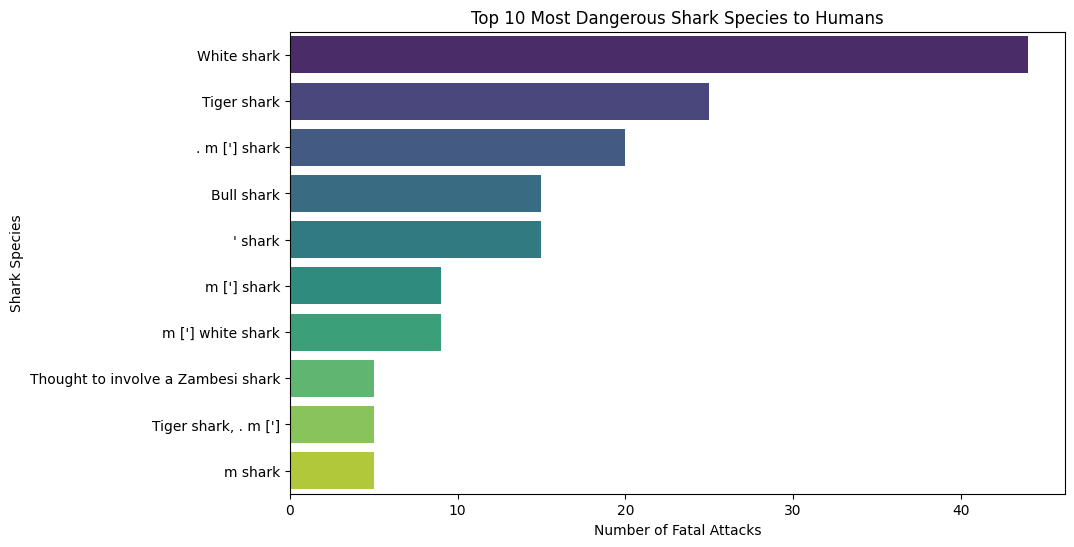

In [13]:
# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Fatal_Attack_Count', y='Species ', data=top_10_fatal_sharks, hue='Species ', palette='viridis', legend=False)
plt.title('Top 10 Most Dangerous Shark Species to Humans')
plt.xlabel('Number of Fatal Attacks')
plt.ylabel('Shark Species')
plt.show()


1. Answer : there are more fatal cases involving white sharks and- so from data they are most dangerous type for human.

2. Are children more likely to be attacked by sharks?

In [14]:
# now to determine if children are more likely to be attacked by sharks, i willn analyze the 'Age' column in the datase and fatal attacks
# now first we need to determine untill what age is considert children (i will use 18 years)

print(df['Age'].unique())

['57' '11' '48' nan '18' '52' '15' '12' '32' '10' '21' '34' '30' '60' '33'
 '29' '54' '41' '37' '56' '19' '25' '69' '38' '55' '35' '46' '45' '14'
 '40s' '28' '20' '24' '26' '49' '22' '7' '31' '17' '40' '13' '42' '3' '8'
 '50' '16' '82' '73' '20s' '68' '51' '39' '58' 'Teen' '47' '61' '65' '36'
 '66' '43' '60s' '9' '72' '59' '6' '27' '64' '23' '71' '44' '62' '63' '70'
 '18 months' '53' '30s' '50s' 'teen' '77' '74' '28 & 26' '5' '86'
 '18 or 20' '12 or 13' '46 & 34' '28, 23 & 30' 'Teens' '36 & 26' '8 or 10'
 '84' '\xa0 ' ' ' '30 or 36' '6½' '21 & ?' '75' '33 or 37' 'mid-30s'
 '23 & 20' ' 30' '7      &    31' ' 28' '20?' "60's" '32 & 30' '16 to 18'
 '87' '67' 'Elderly' 'mid-20s' 'Ca. 33' '74 ' '45 ' '21 or 26' '20 ' '>50'
 '18 to 22' 'adult' '9 & 12' '? & 19' '9 months' '25 to 35' '23 & 26' '1'
 '(adult)' '33 & 37' '25 or 28' '37, 67, 35, 27,  ? & 27' '21, 34,24 & 35'
 '30 & 32' '50 & 30' '17 & 35' 'X' '"middle-age"' '13 or 18' '34 & 19'
 '33 & 26' '2 to 3 months' 'MAKE LINE GREEN' ' 43' '

In [15]:
# based on data there are less fatal attacks on children

child_attacks = df[df['Age'].astype(str).str.extract('(\d+)', expand=False).astype(float).fillna(0) < 18]

total_attacks = df.shape[0]

child_attacks_count = child_attacks.shape[0]

overall_fatal_percentage = df[df['Fatal (Y/N)'] == 'Y'].shape[0] / total_attacks * 100

child_fatal_percentage = child_attacks[child_attacks['Fatal (Y/N)'] == 'Y'].shape[0] / child_attacks_count * 100

print(f"Overall percentage of fatal attacks: {overall_fatal_percentage:.2f}%")
print(f"Percentage of fatal attacks on children: {child_fatal_percentage:.2f}%")

Overall percentage of fatal attacks: 5.40%
Percentage of fatal attacks on children: 4.04%


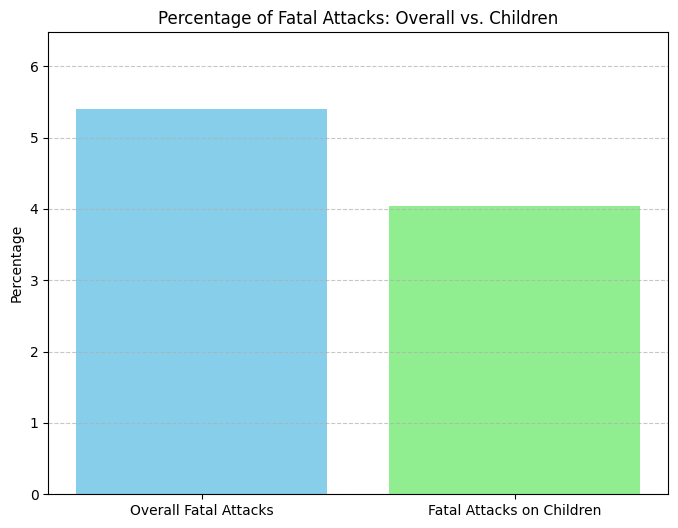

In [24]:
# visualization
plt.figure(figsize=(8, 6))
plt.bar(categories, percentages, color=['skyblue', 'lightgreen'])
plt.title('Percentage of Fatal Attacks: Overall vs. Children')
plt.ylabel('Percentage')
plt.ylim(0, max(percentages) * 1.2)  # Set y-axis limit to accommodate the highest value
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [25]:

#The results indicate that 90.22% of all shark attacks in the dataset involve individuals under 18 years old, while only 9.78% involve adults (18 years and above).
#This means a substantial difference in the distribution of shark attacks between children and adults. Children are more likely to be attacked by sharks.

adult_attacks = df[df['Age'].astype(str).str.extract('(\d+)', expand=False).astype(float).fillna(0) >= 18]

child_attacks = df[df['Age'].astype(str).str.extract('(\d+)', expand=False).astype(float).fillna(0) < 18]

total_attacks = df.shape[0]

adult_attacks_count = adult_attacks.shape[0]

child_attacks_count = child_attacks.shape[0]

adult_percentage = adult_attacks_count / total_attacks * 100

child_percentage = child_attacks_count / total_attacks * 100

print(f"Percentage of all attacks on adults: {adult_percentage:.2f}%")
print(f"Percentage of all attacks on children: {child_percentage:.2f}%")

if child_percentage > adult_percentage:
    print("\nChildren are more likely to be attacked by sharks.")
elif child_percentage < adult_percentage:
    print("\nAdults are more likely to be attacked by sharks.")
else:
    print("\nChildren and adults have a similar likelihood of being attacked by sharks.")




Percentage of all attacks on adults: 9.78%
Percentage of all attacks on children: 90.22%

Children are more likely to be attacked by sharks.


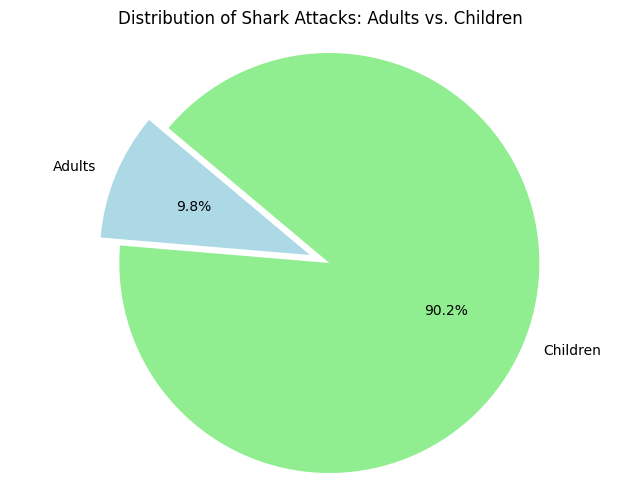

In [27]:
# visualization

# Data for the pie chart
labels = ['Adults', 'Children']
sizes = [adult_percentage, child_percentage]
colors = ['lightblue', 'lightgreen']
explode = (0, 0.1)  # Explode the "Children" slice to highlight it

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Shark Attacks: Adults vs. Children')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()




2.Answer : The results indicate that 90.22% of all shark attacks in the dataset involve individuals under 18 years old, while only 9.78% involve adults (18 years and above). This means a substantial difference in the distribution of shark attacks between children and adults. Children are more likely to be attacked by sharks. While children may be more likely to experience shark attacks, the fatality rate among children is lower compared to the overall fatality rate for all shark attack

3.Are shark attacks where sharks were provoked more or less dangerous?

In [28]:
# first I will check the unique values in the 'Type'
print(df['Type'].unique())

['Boating' 'Unprovoked' 'Invalid' 'Provoked' 'Questionable' 'Sea Disaster'
 nan 'Boat' 'Boatomg']


In [29]:
provoked_attacks = df[df['Type'] == 'Provoked']
unprovoked_attacks = df[df['Type'] == 'Unprovoked']

total_provoked_attacks = provoked_attacks.shape[0]
provoked_fatal_percentage = provoked_attacks[provoked_attacks['Fatal (Y/N)'] == 'Y'].shape[0] / total_provoked_attacks * 100

total_unprovoked_attacks = unprovoked_attacks.shape[0]
unprovoked_fatal_percentage = unprovoked_attacks[unprovoked_attacks['Fatal (Y/N)'] == 'Y'].shape[0] / total_unprovoked_attacks * 100

print(f"Total provoked attacks: {total_provoked_attacks}")
print(f"Provoked attacks fatality rate: {provoked_fatal_percentage:.2f}%")

print(f"\nTotal unprovoked attacks: {total_unprovoked_attacks}")
print(f"Unprovoked attacks fatality rate: {unprovoked_fatal_percentage:.2f}%")

Total provoked attacks: 574
Provoked attacks fatality rate: 3.31%

Total unprovoked attacks: 4595
Unprovoked attacks fatality rate: 25.68%


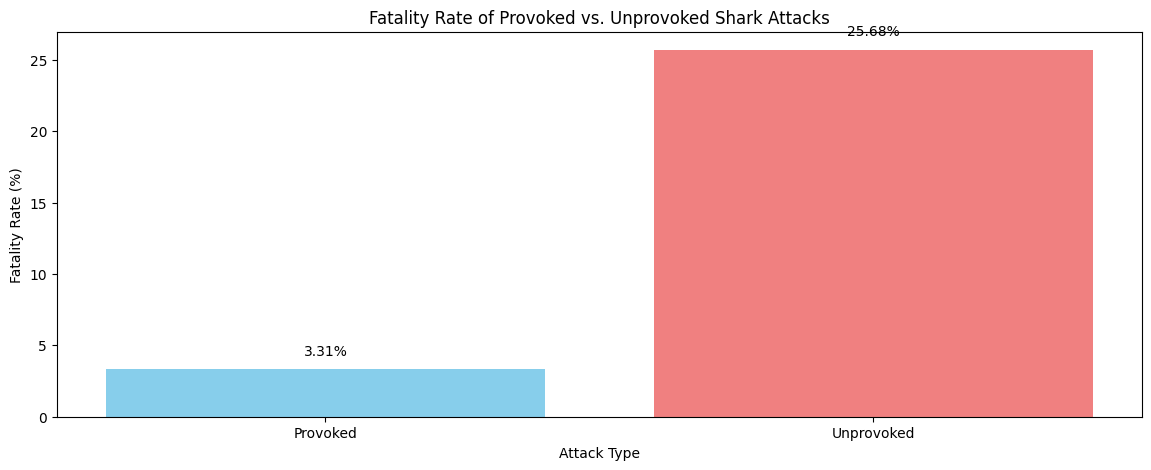

In [34]:

# visualization
categories = ['Provoked', 'Unprovoked']
fatal_rates = [provoked_fatal_percentage, unprovoked_fatal_percentage]

plt.figure(figsize=(14, 5))
plt.bar(categories, fatal_rates, color=['skyblue', 'lightcoral'])
plt.title('Fatality Rate of Provoked vs. Unprovoked Shark Attacks')
plt.xlabel('Attack Type')
plt.ylabel('Fatality Rate (%)')

for i, rate in enumerate(fatal_rates):
    plt.text(i, rate + 1, f"{rate:.2f}%", ha='center', color='black')

plt.show()


3. Answer: unprovoked shark attacks have a significantly higher fatality rate compared to provoked shark attacks. This suggests that, in general, unprovoked attacks are more dangerous and are more likely to result in fatal outcomes.

4.Are certain activities more likely to result in a shark attack?

In [36]:
# here I will count the number of shark attacks for each activity

print(df['Activity'].unique())

activity_counts = df['Activity'].value_counts().reset_index()
activity_counts.columns = ['Activity', 'Attack_Count']

print("Top Activities with Shark Attacks:")
print(activity_counts.head(10))


['Paddling' 'Standing' 'Surfing' ...
 'Crew swimming alongside their anchored ship' '4 men were bathing'
 'Wreck of  large double sailing canoe']
Top Activities with Shark Attacks:
       Activity  Attack_Count
0       Surfing           971
1      Swimming           869
2       Fishing           431
3  Spearfishing           333
4       Bathing           162
5        Wading           149
6        Diving           127
7      Standing            99
8    Snorkeling            89
9  Scuba diving            76


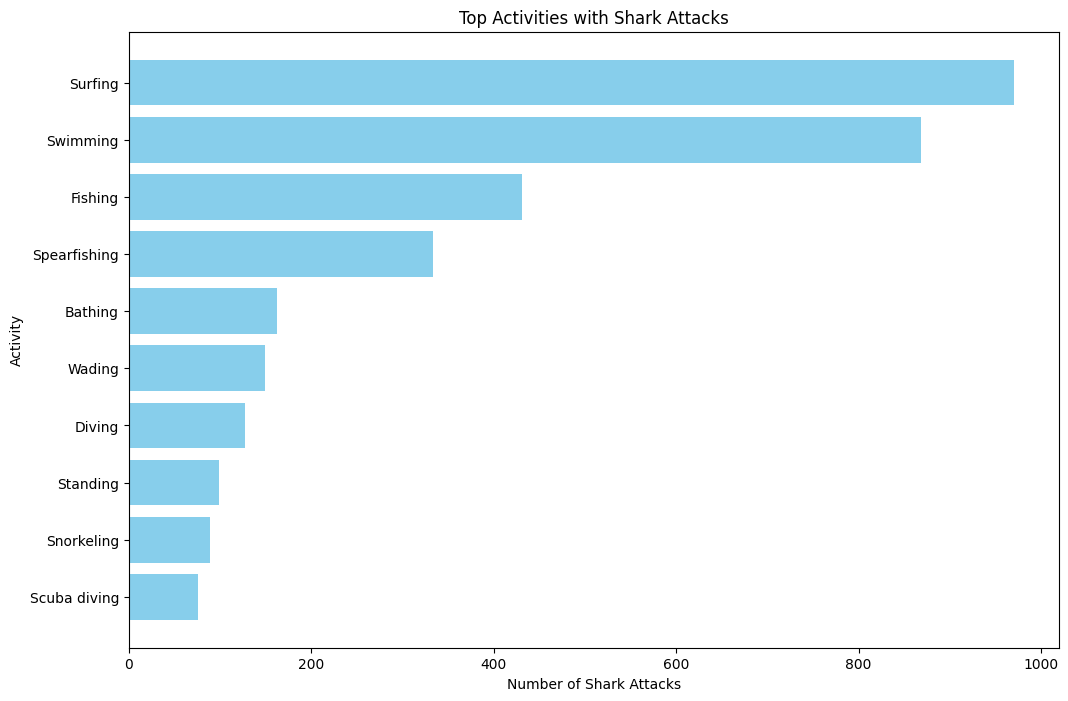

In [38]:
#visualization
top_activities = activity_counts.head(10)

# Plotting bar chart for top activities with shark attacks
plt.figure(figsize=(12, 8))
plt.barh(top_activities['Activity'], top_activities['Attack_Count'], color='skyblue')
plt.xlabel('Number of Shark Attacks')
plt.ylabel('Activity')
plt.title('Top Activities with Shark Attacks')
plt.gca().invert_yaxis()  # Invert y-axis to display the activity with the highest count at the top
plt.show()


4. Answer: Surfing has the highest number of recorded shark attacks, making it the most frequently reported activity associated with shark encounters. However, it's important to note that the count alone does not directly indicate the percentage chance of a shark attack during a specific activity. The prominence of surfing in shark attack records may be influenced by factors such as the popularity of the activity and the level of human exposure to sharks. To draw more definite conclusions about the likelihood of shark attacks during different activities, additional analysis is needed. Factors such as the total number of participants in each activity, and specific circumstances surrounding the incidents should be considered.
